In [158]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [159]:
police=pd.read_csv('police.csv',encoding='utf-8', thousands = ',')
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)


In [160]:
police

,ID,기간코드,지역코드,sum(경찰관수),sum(total)
0,0,17,111191,682,11
1,1,17,111121,1029,18
2,2,17,111221,749,16
3,3,17,111151,748,17
4,4,17,111141,697,12
5,5,17,111241,670,17
6,6,17,111181,917,20
7,7,17,111131,711,12
8,8,17,111262,1071,19
9,9,17,111231,971,15


In [161]:
police["지역코드"].replace([111181,111191,111201,111301,111212,111221,111281,111231,111241,111273,111274,111123,111121,111131,111142,111141,111152,111161,111291,111171,111251,111262,111261,111151,111311],["은평구","서대문구","마포구","양천구","강서구","구로구","금천구","영등포구","동작구","송파구","강동구","종로구","중구","용산구","성동구","광진구","동대문구","성북구","강북구","도봉구","관악구","서초구","강남구","중랑구","노원구"], inplace=True)

In [162]:
police

,ID,기간코드,지역코드,sum(경찰관수),sum(total)
0,0,17,서대문구,682,11
1,1,17,중구,1029,18
2,2,17,구로구,749,16
3,3,17,중랑구,748,17
4,4,17,광진구,697,12
5,5,17,동작구,670,17
6,6,17,은평구,917,20
7,7,17,용산구,711,12
8,8,17,서초구,1071,19
9,9,17,영등포구,971,15


In [163]:
police["기간코드"].replace([17,18,19],[2017,2018,2019], inplace=True)

In [164]:
police

,ID,기간코드,지역코드,sum(경찰관수),sum(total)
0,0,2017,서대문구,682,11
1,1,2017,중구,1029,18
2,2,2017,구로구,749,16
3,3,2017,중랑구,748,17
4,4,2017,광진구,697,12
5,5,2017,동작구,670,17
6,6,2017,은평구,917,20
7,7,2017,용산구,711,12
8,8,2017,서초구,1071,19
9,9,2017,영등포구,971,15


In [165]:
police_s= police.sort_values(by=["기간코드", "지역코드"], ascending=[ True, True]) 


In [166]:
police_s

,ID,기간코드,지역코드,sum(경찰관수),sum(total)
19,19,2017,강남구,1451,23
17,17,2017,강동구,741,16
11,11,2017,강북구,667,14
21,21,2017,강서구,902,12
10,10,2017,관악구,861,19
4,4,2017,광진구,697,12
2,2,2017,구로구,749,16
18,18,2017,금천구,580,12
24,24,2017,노원구,811,18
12,12,2017,도봉구,563,9


In [167]:
police_s['기간코드1'] = police_s['기간코드'].apply(lambda x: "{:0>5d}".format(x))

police_s['기간코드1_name'] = police_s[['기간코드1', '지역코드']].apply(lambda x: '_'.join(x), axis=1)



In [168]:
police_s

,ID,기간코드,지역코드,sum(경찰관수),sum(total),기간코드1,기간코드1_name
19,19,2017,강남구,1451,23,02017,02017_강남구
17,17,2017,강동구,741,16,02017,02017_강동구
11,11,2017,강북구,667,14,02017,02017_강북구
21,21,2017,강서구,902,12,02017,02017_강서구
10,10,2017,관악구,861,19,02017,02017_관악구
4,4,2017,광진구,697,12,02017,02017_광진구
2,2,2017,구로구,749,16,02017,02017_구로구
18,18,2017,금천구,580,12,02017,02017_금천구
24,24,2017,노원구,811,18,02017,02017_노원구
12,12,2017,도봉구,563,9,02017,02017_도봉구


In [169]:
five=pd.read_csv('five_crime.csv',encoding='utf-8', thousands = ',')
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [170]:
five

,기간,지역구,살인,강도,강간강제추행,절도,폭력,5대범죄
0,2017,종로구,7,10,253,1644,2143,4057.0
1,2017,중구,1,9,267,1846,2061,4184.0
2,2017,용산구,1,5,327,1346,2381,4060.0
3,2017,성동구,1,3,132,1072,1559,2767.0
4,2017,광진구,6,13,261,2220,2146,4646.0
5,2017,동대문구,11,3,165,1547,2249,3975.0
6,2017,중랑구,5,3,172,1533,2858,4571.0
7,2017,성북구,7,8,173,1344,1902,3434.0
8,2017,강북구,8,7,208,1014,2156,3393.0
9,2017,도봉구,1,3,104,633,1258,1999.0


In [171]:
crime=pd.read_csv('5대범죄검거.csv',encoding='utf-8', thousands = ',')
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [172]:
crime

,ID,기간코드,지역코드,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거
0,0,17,111251,4154,7,6,323,1152,2666
1,1,17,111231,4012,13,5,267,1108,2619
2,2,17,111273,3870,6,3,242,1026,2593
3,3,17,111201,3499,3,8,429,837,2222
4,4,17,111221,3408,8,6,181,869,2344
5,5,17,111141,3289,5,8,208,1168,1900
6,6,17,111274,3245,6,12,169,949,2109
7,7,17,111311,3047,4,7,155,757,2124
8,8,17,111291,2824,8,5,153,635,2023
9,9,17,111281,2572,5,5,212,674,1676


In [173]:
crime1=pd.read_csv('5대범죄발생검거.csv',encoding='utf-8', thousands = ',')
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [174]:
crime1

,기간,지역구,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거
0,2017,강남구,7720,7,20,607,3130,3956,5321,7,24,496,1383,3411
1,2018,강남구,7513,10,14,600,3004,3885,5196,13,10,523,1317,3333
2,2019,강남구,7304,5,5,666,2970,3658,5069,3,6,562,1339,3159
3,2017,종로구,4057,7,10,253,1644,2143,4437,9,15,1412,905,2096
4,2017,관악구,5525,8,7,379,1979,3152,4154,7,6,323,1152,2666
5,2019,종로구,3846,4,7,238,1515,2082,4117,5,8,1143,1069,1892
6,2018,송파구,5807,5,6,309,2352,3135,4051,6,8,254,1034,2749
7,2017,영등포구,5969,15,5,455,2304,3190,4012,13,5,267,1108,2619
8,2017,강서구,5135,11,4,316,1888,2916,3927,11,6,253,1113,2544
9,2018,영등포구,5840,17,8,391,2292,3132,3922,15,6,267,1064,2570


In [175]:
crime1= crime1.sort_values(by=["기간", "지역구"], ascending=[ True, True]) 

In [176]:
crime1

,기간,지역구,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거
0,2017,강남구,7720,7,20,607,3130,3956,5321,7,24,496,1383,3411
27,2017,강동구,4261,5,10,172,1645,2429,3245,6,12,169,949,2109
43,2017,강북구,3393,8,7,208,1014,2156,2824,8,5,153,635,2023
8,2017,강서구,5135,11,4,316,1888,2916,3927,11,6,253,1113,2544
4,2017,관악구,5525,8,7,379,1979,3152,4154,7,6,323,1152,2666
25,2017,광진구,4646,6,13,261,2220,2146,3289,5,8,208,1168,1900
21,2017,구로구,4895,7,8,328,1725,2827,3408,8,6,181,869,2344
54,2017,금천구,3265,5,5,240,1141,1874,2572,5,5,212,674,1676
34,2017,노원구,4209,4,9,180,1538,2478,3047,4,7,155,757,2124
73,2017,도봉구,1999,1,3,104,633,1258,1652,1,3,115,417,1116


In [177]:
crime1['기간코드1'] = crime1['기간'].apply(lambda x: "{:0>5d}".format(x))

In [178]:
crime1

,기간,지역구,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거,기간코드1
0,2017,강남구,7720,7,20,607,3130,3956,5321,7,24,496,1383,3411,02017
27,2017,강동구,4261,5,10,172,1645,2429,3245,6,12,169,949,2109,02017
43,2017,강북구,3393,8,7,208,1014,2156,2824,8,5,153,635,2023,02017
8,2017,강서구,5135,11,4,316,1888,2916,3927,11,6,253,1113,2544,02017
4,2017,관악구,5525,8,7,379,1979,3152,4154,7,6,323,1152,2666,02017
25,2017,광진구,4646,6,13,261,2220,2146,3289,5,8,208,1168,1900,02017
21,2017,구로구,4895,7,8,328,1725,2827,3408,8,6,181,869,2344,02017
54,2017,금천구,3265,5,5,240,1141,1874,2572,5,5,212,674,1676,02017
34,2017,노원구,4209,4,9,180,1538,2478,3047,4,7,155,757,2124,02017
73,2017,도봉구,1999,1,3,104,633,1258,1652,1,3,115,417,1116,02017


In [179]:
crime1['기간코드1_name'] = crime1[['기간코드1', '지역구']].apply(lambda x: '_'.join(x), axis=1)

In [180]:
crime1

,기간,지역구,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거,기간코드1,기간코드1_name
0,2017,강남구,7720,7,20,607,3130,3956,5321,7,24,496,1383,3411,02017,02017_강남구
27,2017,강동구,4261,5,10,172,1645,2429,3245,6,12,169,949,2109,02017,02017_강동구
43,2017,강북구,3393,8,7,208,1014,2156,2824,8,5,153,635,2023,02017,02017_강북구
8,2017,강서구,5135,11,4,316,1888,2916,3927,11,6,253,1113,2544,02017,02017_강서구
4,2017,관악구,5525,8,7,379,1979,3152,4154,7,6,323,1152,2666,02017,02017_관악구
25,2017,광진구,4646,6,13,261,2220,2146,3289,5,8,208,1168,1900,02017,02017_광진구
21,2017,구로구,4895,7,8,328,1725,2827,3408,8,6,181,869,2344,02017,02017_구로구
54,2017,금천구,3265,5,5,240,1141,1874,2572,5,5,212,674,1676,02017,02017_금천구
34,2017,노원구,4209,4,9,180,1538,2478,3047,4,7,155,757,2124,02017,02017_노원구
73,2017,도봉구,1999,1,3,104,633,1258,1652,1,3,115,417,1116,02017,02017_도봉구


In [181]:
police_s

,ID,기간코드,지역코드,sum(경찰관수),sum(total),기간코드1,기간코드1_name
19,19,2017,강남구,1451,23,02017,02017_강남구
17,17,2017,강동구,741,16,02017,02017_강동구
11,11,2017,강북구,667,14,02017,02017_강북구
21,21,2017,강서구,902,12,02017,02017_강서구
10,10,2017,관악구,861,19,02017,02017_관악구
4,4,2017,광진구,697,12,02017,02017_광진구
2,2,2017,구로구,749,16,02017,02017_구로구
18,18,2017,금천구,580,12,02017,02017_금천구
24,24,2017,노원구,811,18,02017,02017_노원구
12,12,2017,도봉구,563,9,02017,02017_도봉구


In [182]:
crime1

,기간,지역구,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거,기간코드1,기간코드1_name
0,2017,강남구,7720,7,20,607,3130,3956,5321,7,24,496,1383,3411,02017,02017_강남구
27,2017,강동구,4261,5,10,172,1645,2429,3245,6,12,169,949,2109,02017,02017_강동구
43,2017,강북구,3393,8,7,208,1014,2156,2824,8,5,153,635,2023,02017,02017_강북구
8,2017,강서구,5135,11,4,316,1888,2916,3927,11,6,253,1113,2544,02017,02017_강서구
4,2017,관악구,5525,8,7,379,1979,3152,4154,7,6,323,1152,2666,02017,02017_관악구
25,2017,광진구,4646,6,13,261,2220,2146,3289,5,8,208,1168,1900,02017,02017_광진구
21,2017,구로구,4895,7,8,328,1725,2827,3408,8,6,181,869,2344,02017,02017_구로구
54,2017,금천구,3265,5,5,240,1141,1874,2572,5,5,212,674,1676,02017,02017_금천구
34,2017,노원구,4209,4,9,180,1538,2478,3047,4,7,155,757,2124,02017,02017_노원구
73,2017,도봉구,1999,1,3,104,633,1258,1652,1,3,115,417,1116,02017,02017_도봉구


In [183]:
poci=pd.merge(police_s,crime1, on="기간코드1_name", how="outer")

In [184]:
poci

,ID,기간코드,지역코드,sum(경찰관수),sum(total),기간코드1_x,기간코드1_name,기간,지역구,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거,기간코드1_y
0,19,2017,강남구,1451,23,02017,02017_강남구,2017,강남구,7720,7,20,607,3130,3956,5321,7,24,496,1383,3411,02017
1,17,2017,강동구,741,16,02017,02017_강동구,2017,강동구,4261,5,10,172,1645,2429,3245,6,12,169,949,2109,02017
2,11,2017,강북구,667,14,02017,02017_강북구,2017,강북구,3393,8,7,208,1014,2156,2824,8,5,153,635,2023,02017
3,21,2017,강서구,902,12,02017,02017_강서구,2017,강서구,5135,11,4,316,1888,2916,3927,11,6,253,1113,2544,02017
4,10,2017,관악구,861,19,02017,02017_관악구,2017,관악구,5525,8,7,379,1979,3152,4154,7,6,323,1152,2666,02017
5,4,2017,광진구,697,12,02017,02017_광진구,2017,광진구,4646,6,13,261,2220,2146,3289,5,8,208,1168,1900,02017
6,2,2017,구로구,749,16,02017,02017_구로구,2017,구로구,4895,7,8,328,1725,2827,3408,8,6,181,869,2344,02017
7,18,2017,금천구,580,12,02017,02017_금천구,2017,금천구,3265,5,5,240,1141,1874,2572,5,5,212,674,1676,02017
8,24,2017,노원구,811,18,02017,02017_노원구,2017,노원구,4209,4,9,180,1538,2478,3047,4,7,155,757,2124,02017
9,12,2017,도봉구,563,9,02017,02017_도봉구,2017,도봉구,1999,1,3,104,633,1258,1652,1,3,115,417,1116,02017


In [185]:
# 이이후로 약간의 공정


In [229]:
poci1=poci.drop(["ID","기간코드1_x","기간코드1_name","기간","지역구","기간코드1_y"],axis=1)

In [230]:
poci1

,기간코드,지역코드,sum(경찰관수),sum(total),발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거
0,2017,강남구,1451,23,7720,7,20,607,3130,3956,5321,7,24,496,1383,3411
1,2017,강동구,741,16,4261,5,10,172,1645,2429,3245,6,12,169,949,2109
2,2017,강북구,667,14,3393,8,7,208,1014,2156,2824,8,5,153,635,2023
3,2017,강서구,902,12,5135,11,4,316,1888,2916,3927,11,6,253,1113,2544
4,2017,관악구,861,19,5525,8,7,379,1979,3152,4154,7,6,323,1152,2666
5,2017,광진구,697,12,4646,6,13,261,2220,2146,3289,5,8,208,1168,1900
6,2017,구로구,749,16,4895,7,8,328,1725,2827,3408,8,6,181,869,2344
7,2017,금천구,580,12,3265,5,5,240,1141,1874,2572,5,5,212,674,1676
8,2017,노원구,811,18,4209,4,9,180,1538,2478,3047,4,7,155,757,2124
9,2017,도봉구,563,9,1999,1,3,104,633,1258,1652,1,3,115,417,1116


In [231]:
poci1.rename(columns = {"sum(경찰관수)": "경찰관수"},inplace = True)


In [232]:
poci1

,기간코드,지역코드,경찰관수,sum(total),발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거
0,2017,강남구,1451,23,7720,7,20,607,3130,3956,5321,7,24,496,1383,3411
1,2017,강동구,741,16,4261,5,10,172,1645,2429,3245,6,12,169,949,2109
2,2017,강북구,667,14,3393,8,7,208,1014,2156,2824,8,5,153,635,2023
3,2017,강서구,902,12,5135,11,4,316,1888,2916,3927,11,6,253,1113,2544
4,2017,관악구,861,19,5525,8,7,379,1979,3152,4154,7,6,323,1152,2666
5,2017,광진구,697,12,4646,6,13,261,2220,2146,3289,5,8,208,1168,1900
6,2017,구로구,749,16,4895,7,8,328,1725,2827,3408,8,6,181,869,2344
7,2017,금천구,580,12,3265,5,5,240,1141,1874,2572,5,5,212,674,1676
8,2017,노원구,811,18,4209,4,9,180,1538,2478,3047,4,7,155,757,2124
9,2017,도봉구,563,9,1999,1,3,104,633,1258,1652,1,3,115,417,1116


In [233]:
poci1.rename(columns = {"sum(total)": "경찰관총수"},inplace = True)

In [234]:
poci1

,기간코드,지역코드,경찰관수,경찰관총수,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거
0,2017,강남구,1451,23,7720,7,20,607,3130,3956,5321,7,24,496,1383,3411
1,2017,강동구,741,16,4261,5,10,172,1645,2429,3245,6,12,169,949,2109
2,2017,강북구,667,14,3393,8,7,208,1014,2156,2824,8,5,153,635,2023
3,2017,강서구,902,12,5135,11,4,316,1888,2916,3927,11,6,253,1113,2544
4,2017,관악구,861,19,5525,8,7,379,1979,3152,4154,7,6,323,1152,2666
5,2017,광진구,697,12,4646,6,13,261,2220,2146,3289,5,8,208,1168,1900
6,2017,구로구,749,16,4895,7,8,328,1725,2827,3408,8,6,181,869,2344
7,2017,금천구,580,12,3265,5,5,240,1141,1874,2572,5,5,212,674,1676
8,2017,노원구,811,18,4209,4,9,180,1538,2478,3047,4,7,155,757,2124
9,2017,도봉구,563,9,1999,1,3,104,633,1258,1652,1,3,115,417,1116


In [236]:
poci1.rename(columns = {"기간코드": "년도"},inplace = True)

In [237]:
poci1.rename(columns = {"지역코드": "지역구"},inplace = True)

In [238]:
poci1

,년도,지역구,경찰관수,경찰관총수,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거
0,2017,강남구,1451,23,7720,7,20,607,3130,3956,5321,7,24,496,1383,3411
1,2017,강동구,741,16,4261,5,10,172,1645,2429,3245,6,12,169,949,2109
2,2017,강북구,667,14,3393,8,7,208,1014,2156,2824,8,5,153,635,2023
3,2017,강서구,902,12,5135,11,4,316,1888,2916,3927,11,6,253,1113,2544
4,2017,관악구,861,19,5525,8,7,379,1979,3152,4154,7,6,323,1152,2666
5,2017,광진구,697,12,4646,6,13,261,2220,2146,3289,5,8,208,1168,1900
6,2017,구로구,749,16,4895,7,8,328,1725,2827,3408,8,6,181,869,2344
7,2017,금천구,580,12,3265,5,5,240,1141,1874,2572,5,5,212,674,1676
8,2017,노원구,811,18,4209,4,9,180,1538,2478,3047,4,7,155,757,2124
9,2017,도봉구,563,9,1999,1,3,104,633,1258,1652,1,3,115,417,1116


In [248]:
 # poci2= poci1.fillna(0)

In [250]:
pd.to_numeric(poci1['살인검거'], errors='coerce')

0      7.0
1      6.0
2      8.0
3     11.0
4      7.0
5      5.0
6      8.0
7      5.0
8      4.0
9      1.0
10    10.0
11     1.0
12     3.0
13     4.0
14    10.0
15     1.0
16     7.0
17     6.0
18     2.0
19    13.0
20     1.0
21     6.0
22     9.0
23     NaN
24     5.0
25    13.0
26     3.0
27     6.0
28     9.0
29     9.0
30     5.0
31     8.0
32     6.0
33     4.0
34     1.0
35     2.0
36     3.0
37     6.0
38     4.0
39     5.0
40     2.0
41     6.0
42     6.0
43     3.0
44    15.0
45     1.0
46     8.0
47     7.0
48     2.0
49     5.0
50     3.0
51     5.0
52     6.0
53     9.0
54    10.0
55     5.0
56     9.0
57     6.0
58     4.0
59     1.0
60     6.0
61     2.0
62     2.0
63     1.0
64     5.0
65     5.0
66     3.0
67     8.0
68     6.0
69    10.0
70     3.0
71     3.0
72     5.0
73     1.0
74    10.0
Name: 살인검거, dtype: float64

In [251]:
poci1['살인검거']=pd.to_numeric(poci1['살인검거'], errors='coerce')


In [252]:
poci1

,년도,지역구,경찰관수,경찰관총수,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거,검거율/발생율,강도검거율,절도검거율,폭력검거율
0,2017,강남구,1451,23,7720,7,20,607,3130,3956,5321,7.0,24,496,1383,3411,0.689249,0.833333,2.263196,1.159777
1,2017,강동구,741,16,4261,5,10,172,1645,2429,3245,6.0,12,169,949,2109,0.761558,0.833333,1.733404,1.151731
2,2017,강북구,667,14,3393,8,7,208,1014,2156,2824,8.0,5,153,635,2023,0.832302,1.400000,1.596850,1.065744
3,2017,강서구,902,12,5135,11,4,316,1888,2916,3927,11.0,6,253,1113,2544,0.764752,0.666667,1.696316,1.146226
4,2017,관악구,861,19,5525,8,7,379,1979,3152,4154,7.0,6,323,1152,2666,0.751855,1.166667,1.717882,1.182296
5,2017,광진구,697,12,4646,6,13,261,2220,2146,3289,5.0,8,208,1168,1900,0.707921,1.625000,1.900685,1.129474
6,2017,구로구,749,16,4895,7,8,328,1725,2827,3408,8.0,6,181,869,2344,0.696221,1.333333,1.985040,1.206058
7,2017,금천구,580,12,3265,5,5,240,1141,1874,2572,5.0,5,212,674,1676,0.787749,1.000000,1.692878,1.118138
8,2017,노원구,811,18,4209,4,9,180,1538,2478,3047,4.0,7,155,757,2124,0.723925,1.285714,2.031704,1.166667
9,2017,도봉구,563,9,1999,1,3,104,633,1258,1652,1.0,3,115,417,1116,0.826413,1.000000,1.517986,1.127240


In [260]:
poci1["검거율/발생율"]=poci1["검거합계"]/poci1["발생합계"]

In [261]:
poci1["강도검거율"]=poci1["강도검거"]/poci1["강도발생"]

In [262]:
poci1["절도검거율"]=poci1["절도검거"]/poci1["절도발생"]

In [263]:
poci1["폭력검거율"]=poci1["폭력검거"]/poci1["폭력발생"]            

In [264]:
poci1["살인검거율"]=poci1["살인검거"]/poci1["살인발생"]       

In [265]:
poci1["강간강제추행검거율"]=poci1["강간강제추행검거"]/poci1["강간강제추행발생"] 

In [266]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [267]:
poci1

,년도,지역구,경찰관수,경찰관총수,발생합계,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생,검거합계,살인검거,강도검거,강간강제추행검거,절도검거,폭력검거,검거율/발생율,강도검거율,절도검거율,폭력검거율,살인검거율,강간강제추행검거율
0,2017,강남구,1451,23,7720,7,20,607,3130,3956,5321,7.0,24,496,1383,3411,0.689249,1.200000,0.441853,0.862235,1.000000,0.817133
1,2017,강동구,741,16,4261,5,10,172,1645,2429,3245,6.0,12,169,949,2109,0.761558,1.200000,0.576900,0.868259,1.200000,0.982558
2,2017,강북구,667,14,3393,8,7,208,1014,2156,2824,8.0,5,153,635,2023,0.832302,0.714286,0.626233,0.938312,1.000000,0.735577
3,2017,강서구,902,12,5135,11,4,316,1888,2916,3927,11.0,6,253,1113,2544,0.764752,1.500000,0.589513,0.872428,1.000000,0.800633
4,2017,관악구,861,19,5525,8,7,379,1979,3152,4154,7.0,6,323,1152,2666,0.751855,0.857143,0.582112,0.845812,0.875000,0.852243
5,2017,광진구,697,12,4646,6,13,261,2220,2146,3289,5.0,8,208,1168,1900,0.707921,0.615385,0.526126,0.885368,0.833333,0.796935
6,2017,구로구,749,16,4895,7,8,328,1725,2827,3408,8.0,6,181,869,2344,0.696221,0.750000,0.503768,0.829148,1.142857,0.551829
7,2017,금천구,580,12,3265,5,5,240,1141,1874,2572,5.0,5,212,674,1676,0.787749,1.000000,0.590710,0.894344,1.000000,0.883333
8,2017,노원구,811,18,4209,4,9,180,1538,2478,3047,4.0,7,155,757,2124,0.723925,0.777778,0.492198,0.857143,1.000000,0.861111
9,2017,도봉구,563,9,1999,1,3,104,633,1258,1652,1.0,3,115,417,1116,0.826413,1.000000,0.658768,0.887122,1.000000,1.105769


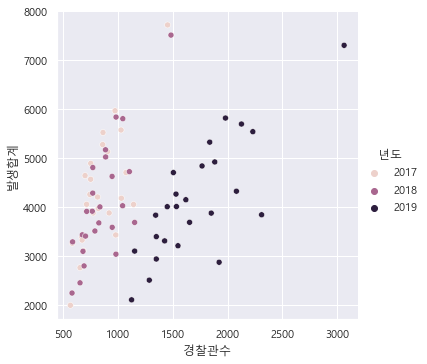

In [308]:
sns.relplot(x="경찰관수", y="발생합계", hue="년도",data=poci1);

C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  fon

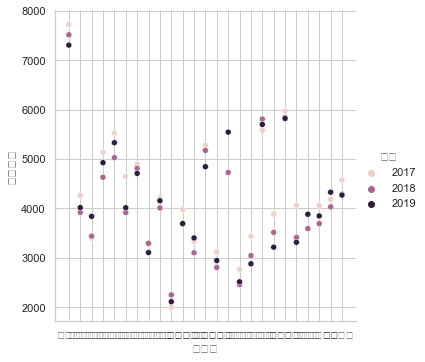

In [268]:
sns.relplot(x="지역구", y="발생합계", hue="년도",data=poci1);

C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  fon

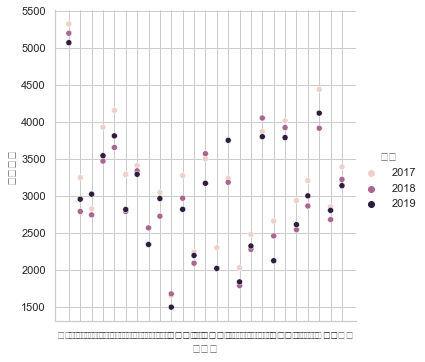

In [269]:
sns.relplot(x="지역구", y="검거합계", hue="년도",data=poci1);

C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  fon

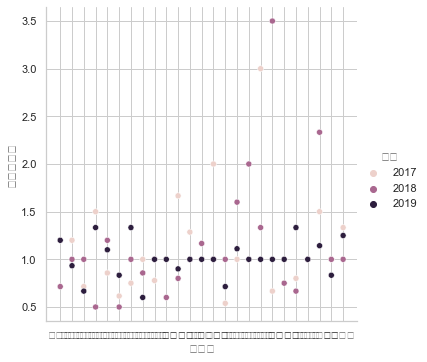

In [270]:
sns.relplot(x="지역구", y="강도검거율", hue="년도",data=poci1);

C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  fon

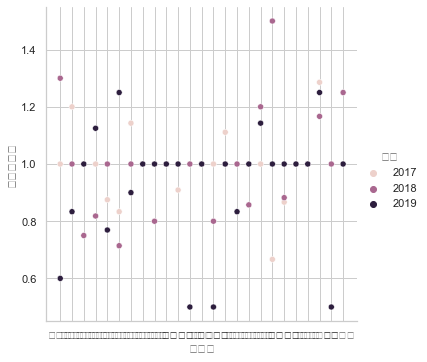

In [271]:
sns.relplot(x="지역구", y="살인검거율", hue="년도",data=poci1);

C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  fon

C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)


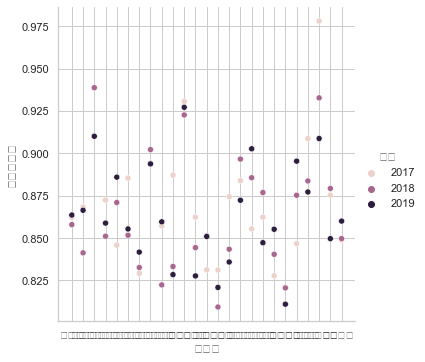

In [272]:
sns.relplot(x="지역구", y="폭력검거율", hue="년도",data=poci1);

C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ui\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  fon

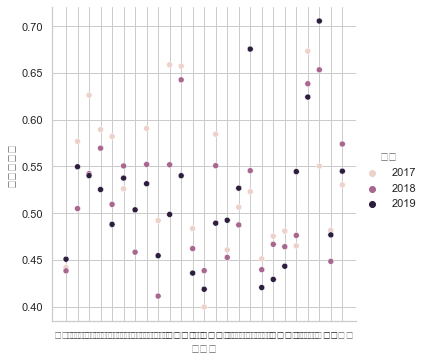

In [275]:
sns.relplot(x="지역구", y="절도검거율", hue="년도",data=poci1);

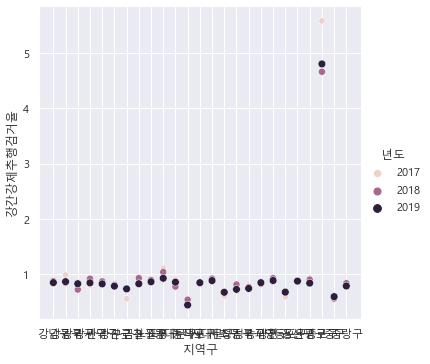

In [285]:
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
# 폰트 깨지면 재설정

sns.relplot(x="지역구", y="강간강제추행검거율", hue="년도",size="년도",sizes=(40,60),data=poci1);

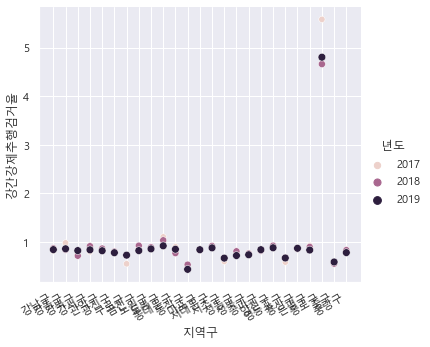

In [287]:
g=sns.relplot(x="지역구", y="강간강제추행검거율", hue="년도",size="년도",sizes=(40,60),data=poci1);
g.fig.autofmt_xdate()  #인덱스 오버되는부분 기울여서 수정

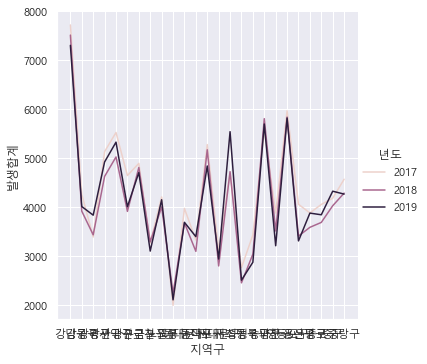

In [288]:
sns.relplot(x="지역구", y="발생합계", hue="년도",kind="line",data=poci1);

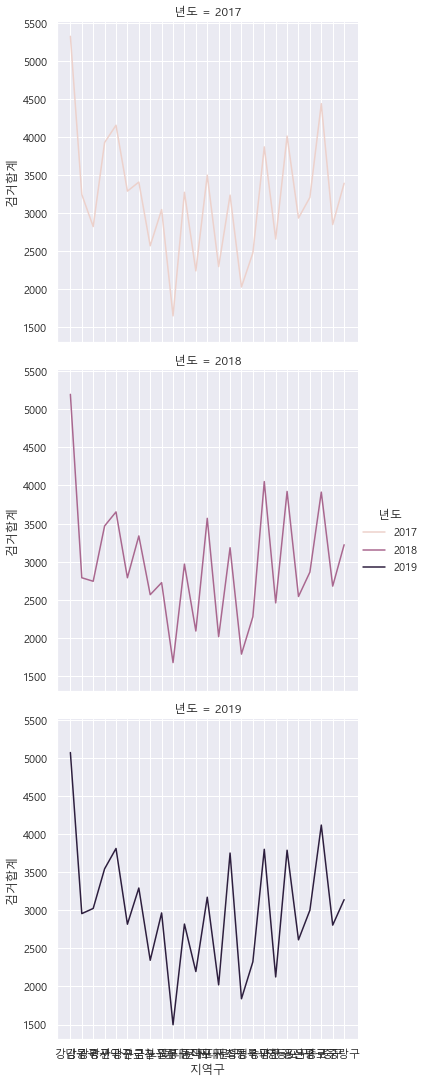

In [292]:
sns.relplot(x="지역구", y="검거합계", row="년도",hue="년도", ci="sd",kind="line",data=poci1);

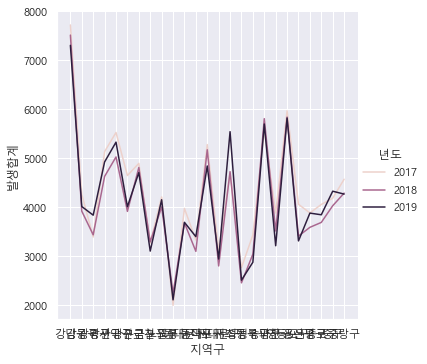

In [294]:
sns.relplot(x="지역구", y="발생합계", hue="년도",kind="line",estimator=None,data=poci1);

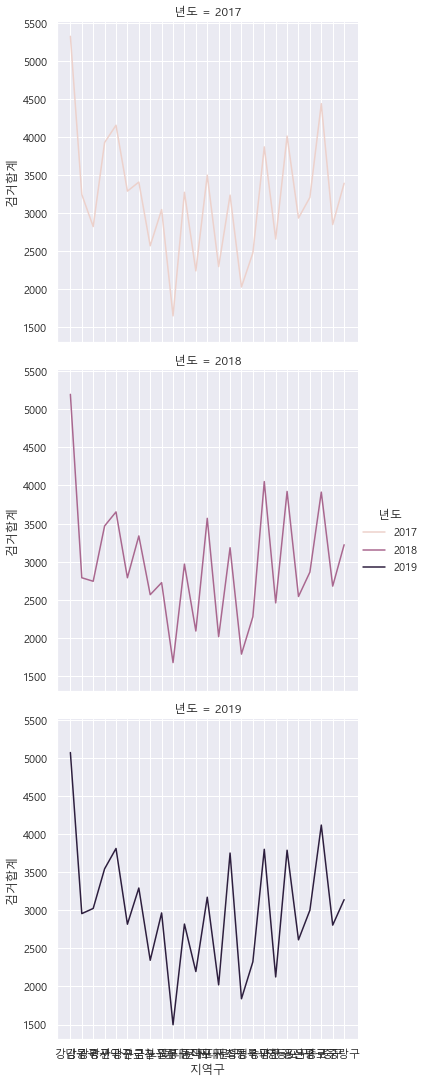

In [295]:
sns.relplot(x="지역구", y="검거합계", row="년도",hue="년도", estimator=None,kind="line",data=poci1);

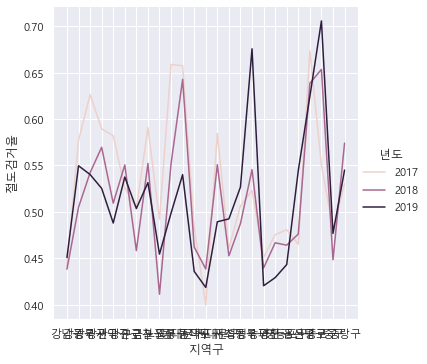

In [296]:
sns.relplot(x="지역구", y="절도검거율", hue="년도",kind="line",data=poci1);

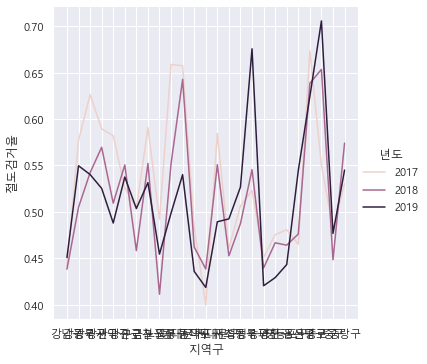

In [298]:
sns.relplot(x="지역구", y="절도검거율", hue="년도",kind="line",data=poci1);

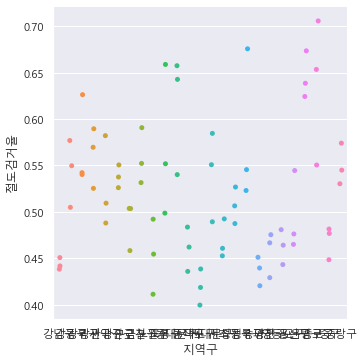

In [300]:
sns.catplot(x="지역구", y="절도검거율",data=poci1);

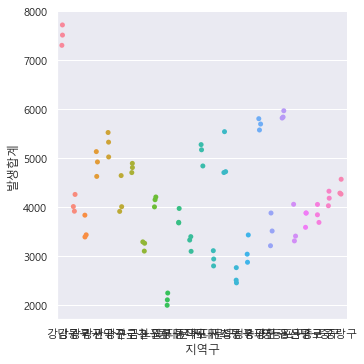

In [301]:
sns.catplot(x="지역구", y="발생합계",data=poci1);

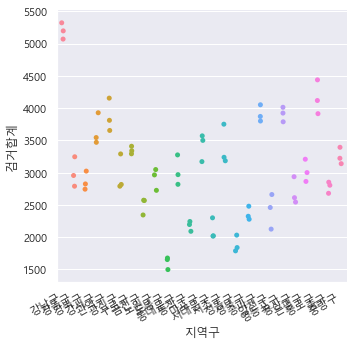

In [304]:
g=sns.catplot(x="지역구", y="검거합계",data=poci1);
g.fig.autofmt_xdate()

C:\Users\ui\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


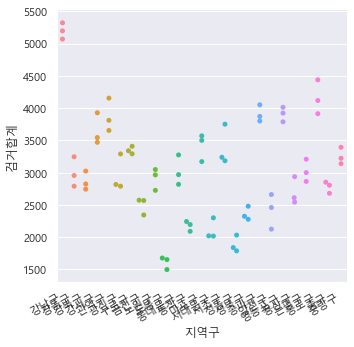

In [311]:
g=sns.catplot(x="지역구", y="검거합계",kind='swarm',data=poci1);
g.fig.autofmt_xdate()

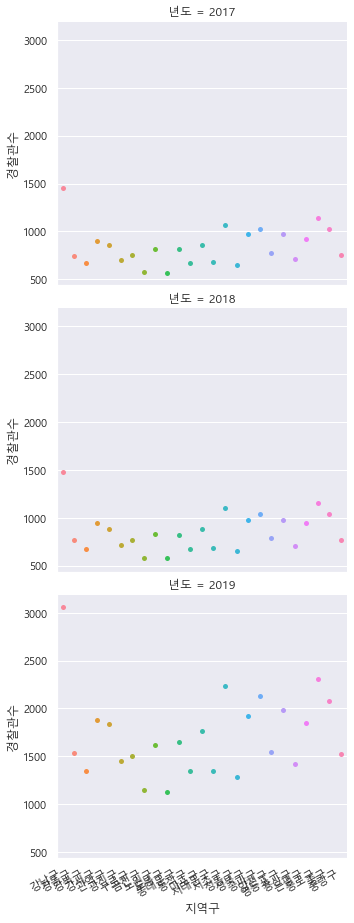

In [313]:
g=sns.catplot(x="지역구", y="경찰관수",kind='swarm',row="년도",data=poci1);
g.fig.autofmt_xdate()

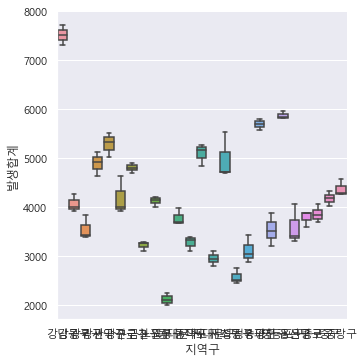

In [314]:
sns.catplot(x="지역구",y="발생합계",
            kind="box",data=poci1);

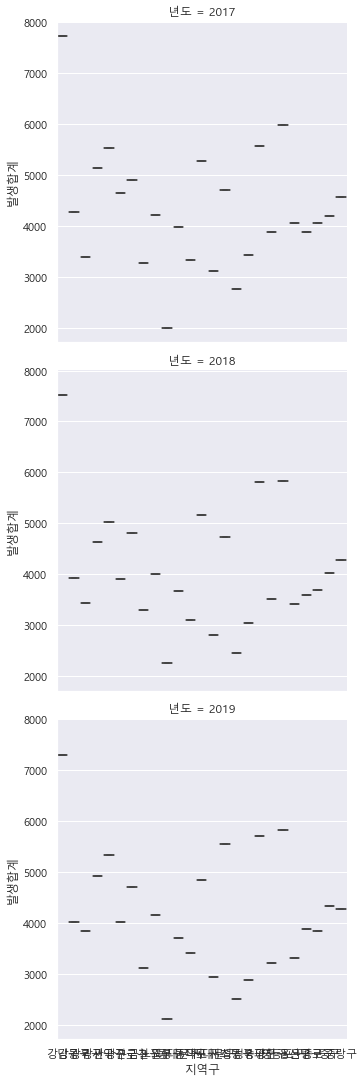

In [315]:
sns.catplot(x="지역구",y="발생합계",
            kind="box",row="년도",data=poci1);

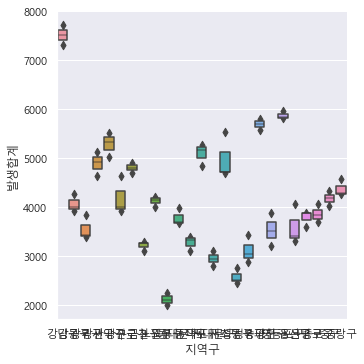

In [316]:
sns.catplot(x="지역구",y="발생합계",
            kind="boxen",data=poci1);

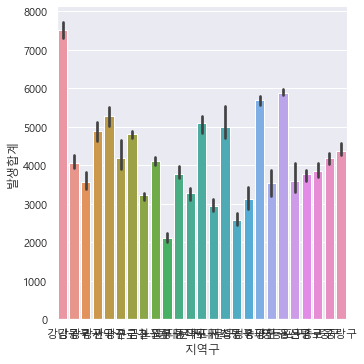

In [317]:
sns.catplot(x="지역구",y="발생합계",
            kind="bar",data=poci1);

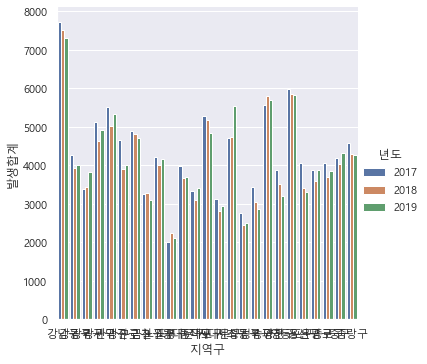

In [318]:
sns.catplot(x="지역구",y="발생합계",
            kind="bar", hue="년도",data=poci1);

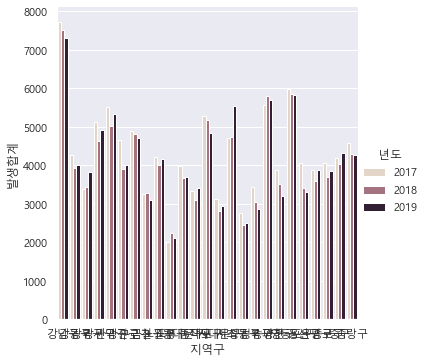

In [319]:
sns.catplot(x="지역구",y="발생합계",
            kind="bar", hue="년도", palette='ch:.20',data=poci1);

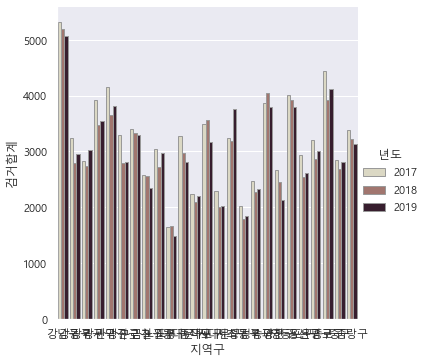

In [322]:
sns.catplot(x="지역구",y="검거합계",
            kind="bar", hue="년도", palette='ch:.40',edgecolor='.6',data=poci1);

C:\Users\ui\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '강남구'

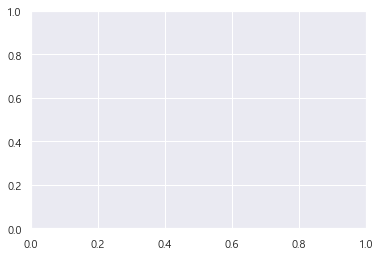

In [324]:
sns.distplot(poci1);

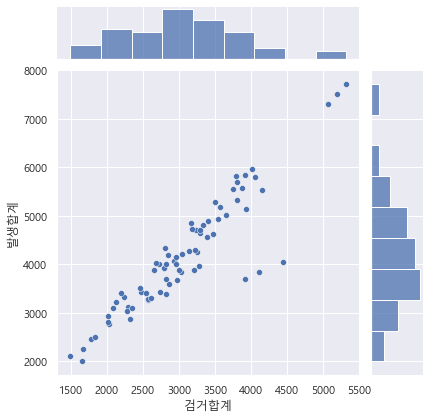

In [336]:
sns.jointplot(x=poci1["검거합계"],y=poci1["발생합계"],kind="scatter")

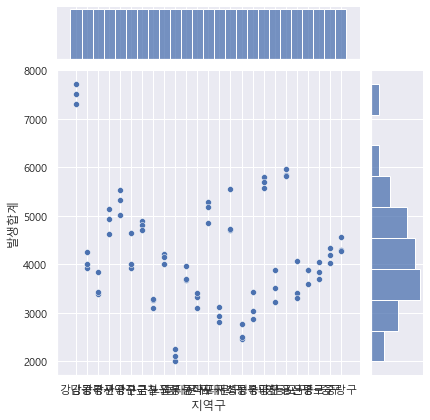

In [337]:
sns.jointplot(x=poci1["지역구"],y=poci1["발생합계"],kind="scatter")

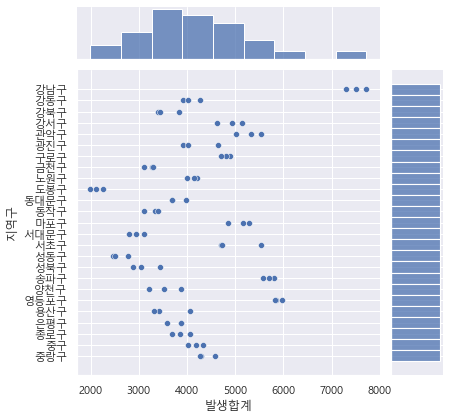

In [338]:
sns.jointplot(x=poci1["발생합계"],y=poci1["지역구"],kind="scatter")

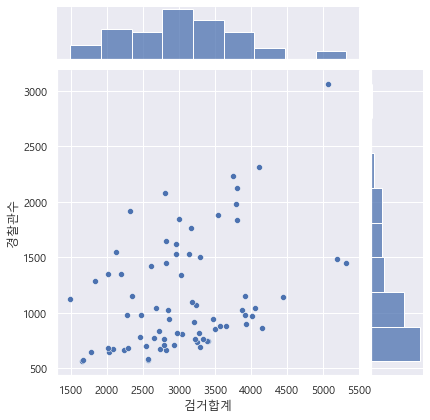

In [339]:
sns.jointplot(x=poci1["검거합계"],y=poci1["경찰관수"],kind="scatter")

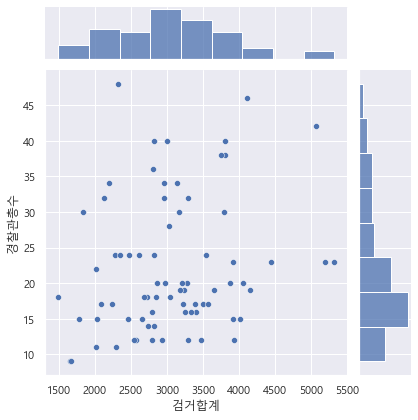

In [340]:
sns.jointplot(x=poci1["검거합계"],y=poci1["경찰관총수"],kind="scatter")

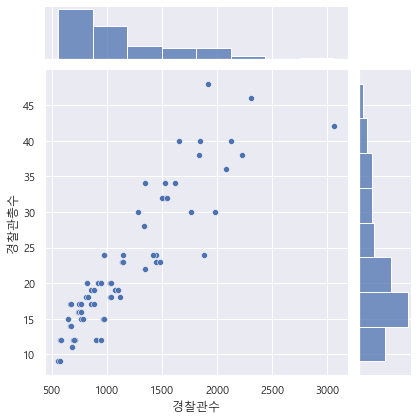

In [342]:
sns.jointplot(x=poci1["경찰관수"],y=poci1["경찰관총수"],kind="scatter")

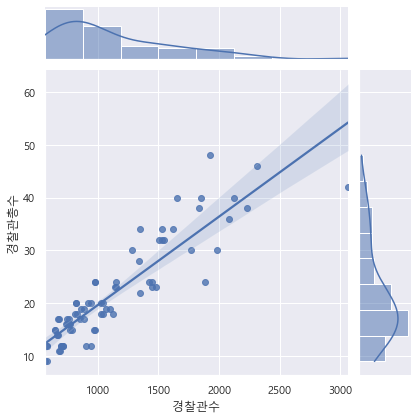

In [343]:
sns.jointplot(x=poci1["경찰관수"],y=poci1["경찰관총수"],kind="reg")

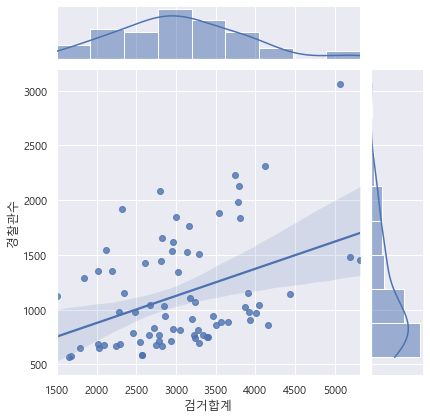

In [344]:
sns.jointplot(x=poci1["검거합계"],y=poci1["경찰관수"],kind="reg")

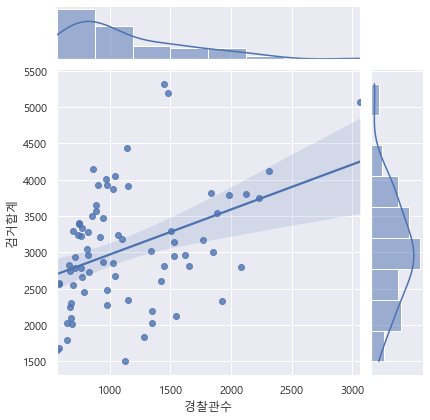

In [366]:
sns.jointplot(x=poci1["경찰관수"],y=poci1["검거합계"],kind="reg")

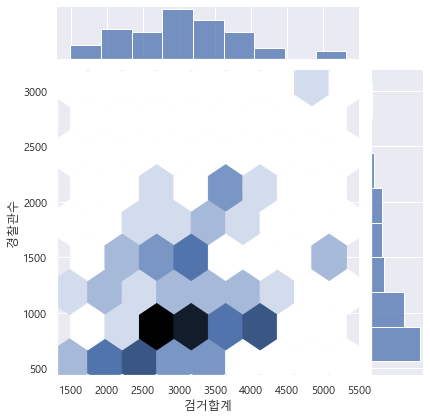

In [345]:
sns.jointplot(x=poci1["검거합계"],y=poci1["경찰관수"],kind="hex")

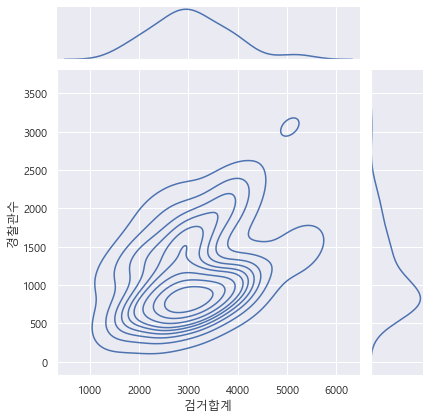

In [347]:
sns.jointplot(x=poci1["검거합계"],y=poci1["경찰관수"],kind="kde")

C:\Users\ui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ui\anaconda3\lib\site-packages\seaborn\distributions.py:2065: FutureWarning:

Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 



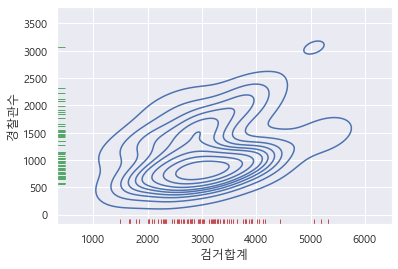

In [368]:
sns.kdeplot(poci1["검거합계"],poci1["경찰관수"])
sns.rugplot(poci1["검거합계"], color="r")
sns.rugplot(poci1["경찰관수"], color="g", vertical=True);

C:\Users\ui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ui\anaconda3\lib\site-packages\seaborn\distributions.py:2065: FutureWarning:

Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 



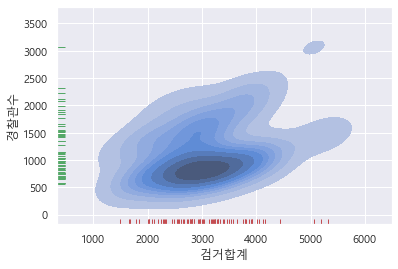

In [369]:
sns.kdeplot(poci1["검거합계"],poci1["경찰관수"],shade=True)
sns.rugplot(poci1["검거합계"], color="r")
sns.rugplot(poci1["경찰관수"], color="g", vertical=True);

C:\Users\ui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ui\anaconda3\lib\site-packages\seaborn\distributions.py:2065: FutureWarning:

Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 



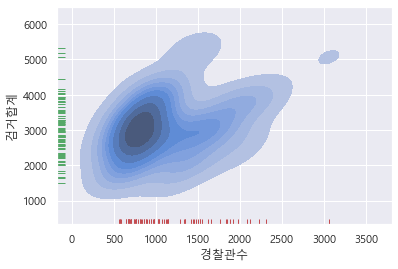

In [370]:
sns.kdeplot(poci1["경찰관수"],poci1["검거합계"],shade=True)
sns.rugplot(poci1["경찰관수"], color="r")
sns.rugplot(poci1["검거합계"], color="g", vertical=True);

C:\Users\ui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



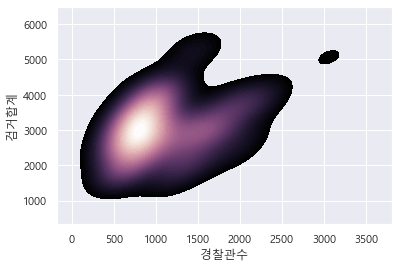

In [371]:
cmap=sns.cubehelix_palette(as_cmap=True, dark=0, light=1,reverse=True)
sns.kdeplot(poci1["경찰관수"],poci1["검거합계"], cmap=cmap, n_levels=60, shade=True);

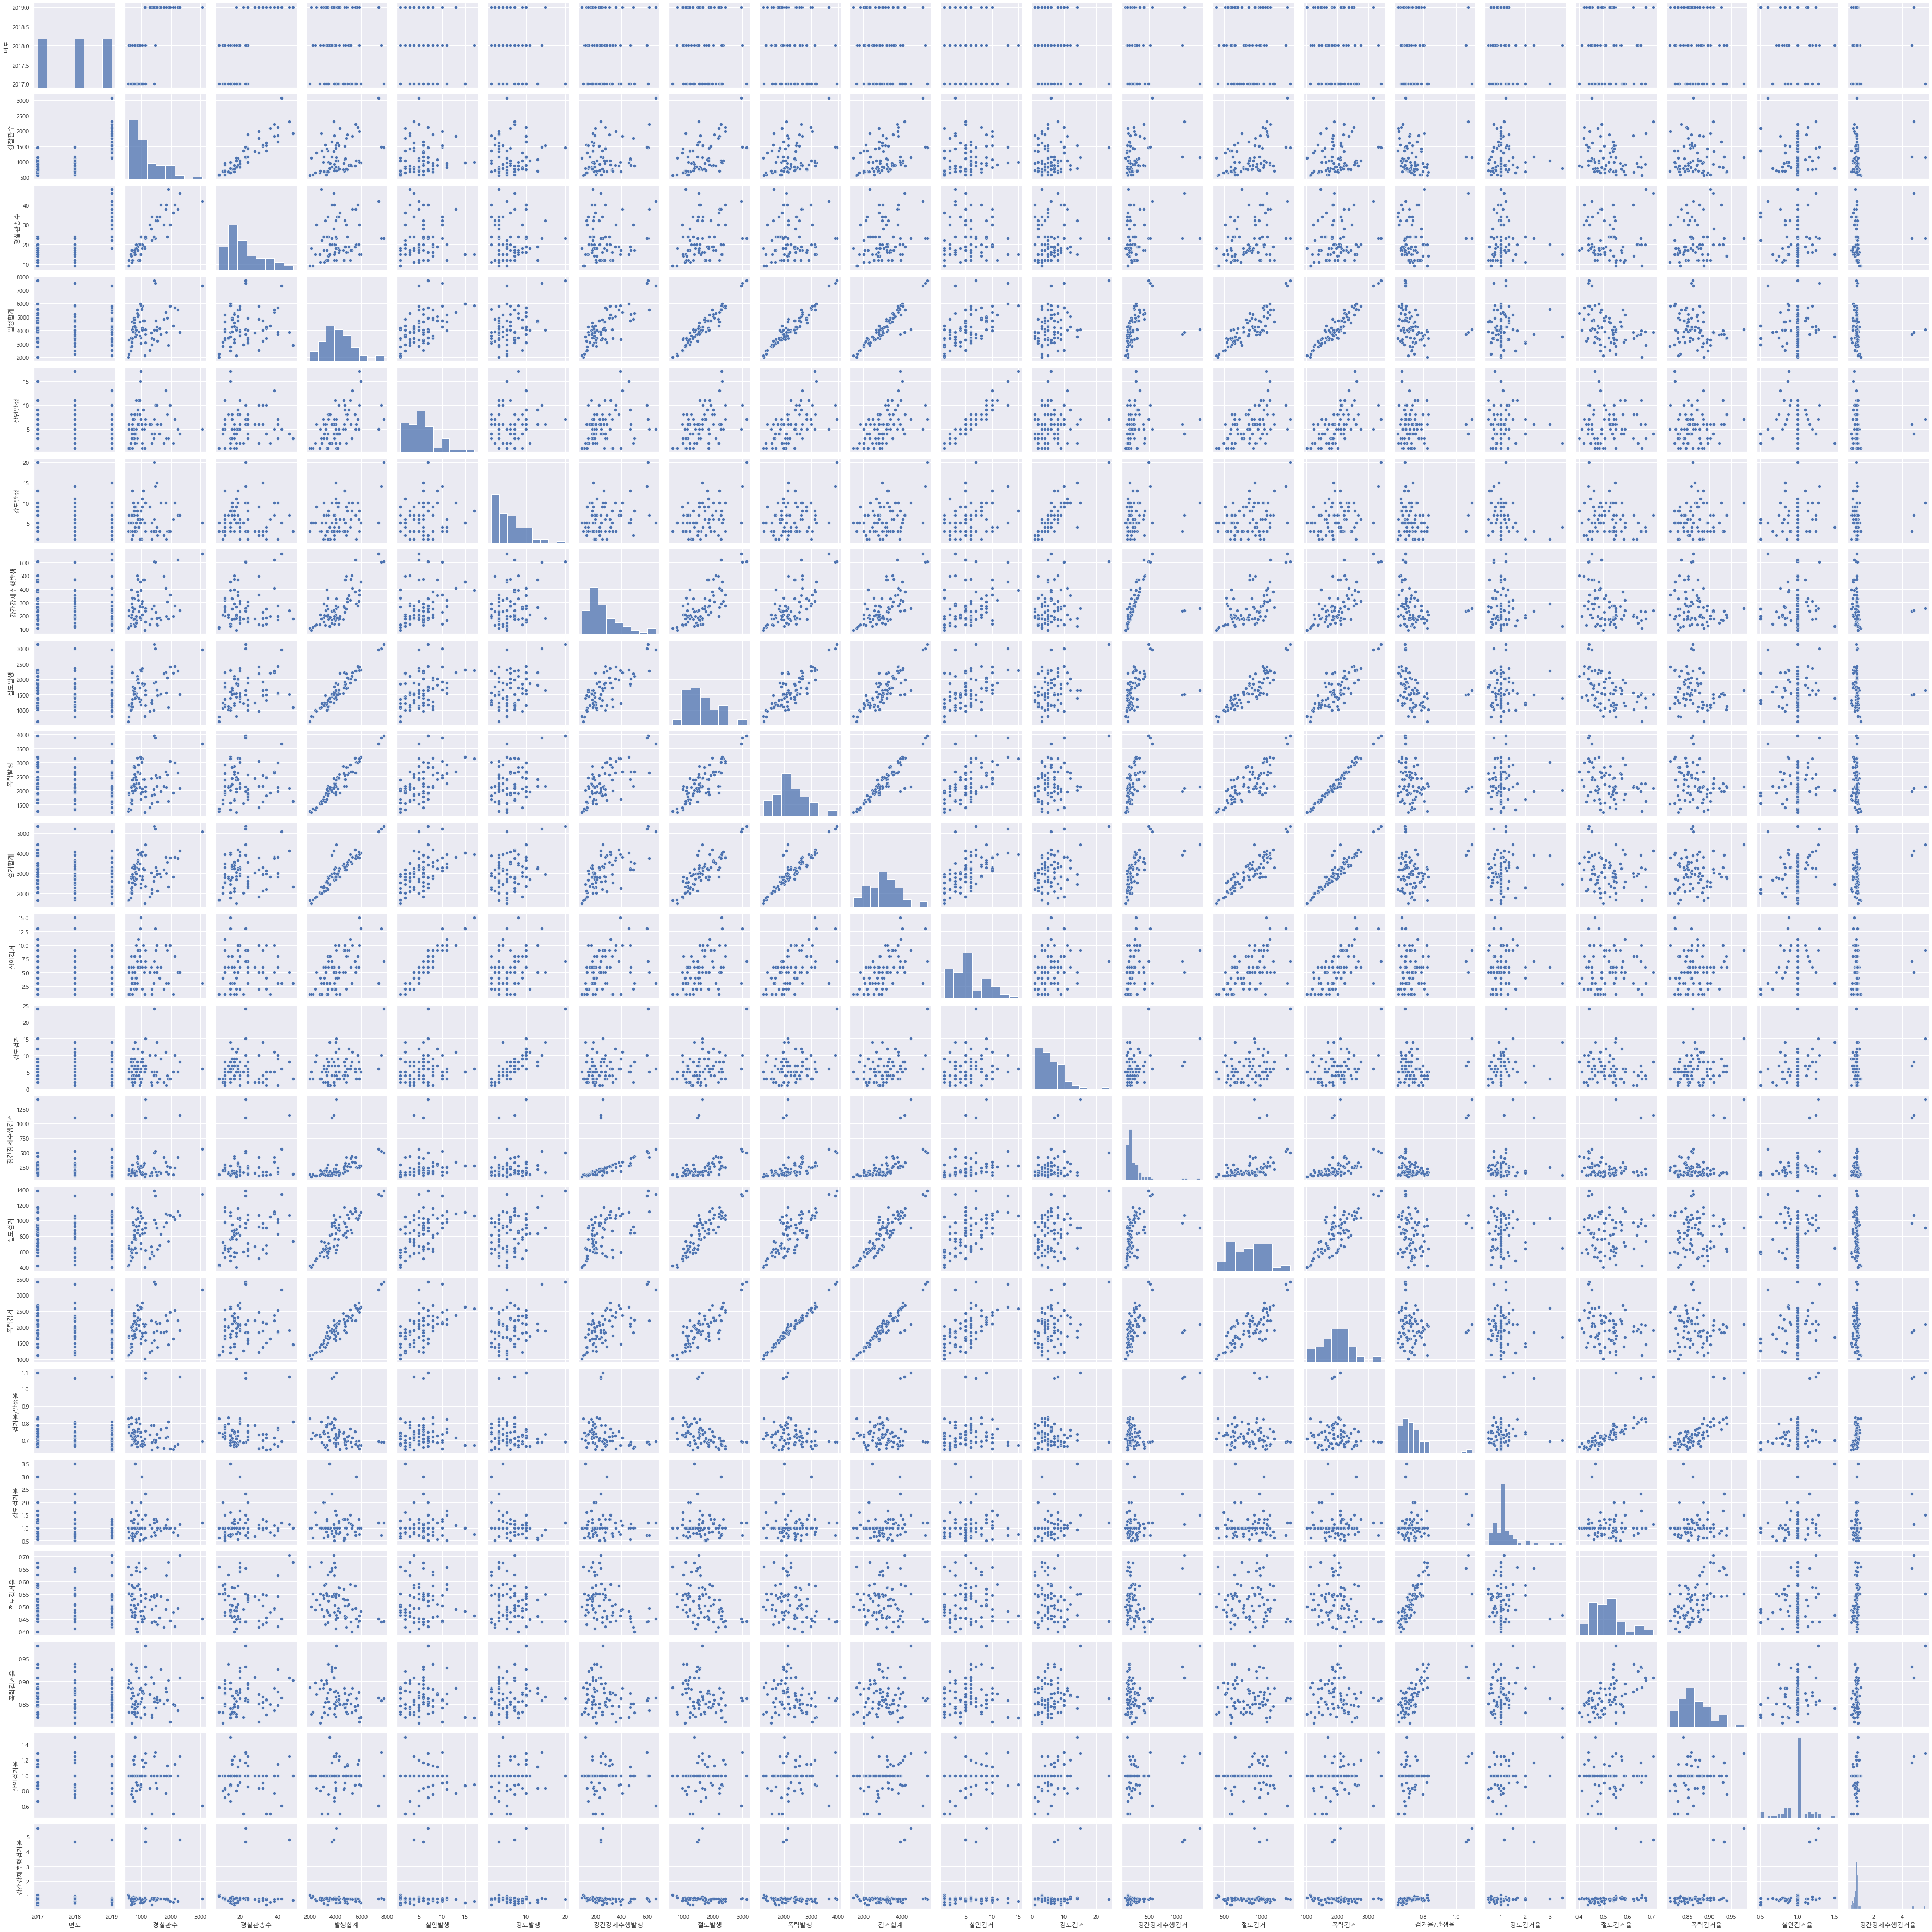

In [373]:
sns.pairplot(poci1)

In [ ]:
sns.pairplot(poci1,hue="년도");